# Simple example 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/PyJobShop/PyJobShop/blob/main/examples/simple_example.ipynb)

> If you're using this notebook in Google Colab, be sure to install PyJobShop first by executing ```pip install pyjobshop``` in a cell.

This notebook provides a brief overview of PyJobShop's modeling features for solving scheduling problems, specifically:

- How to model a simple scheduling problem using PyJobShop's `Model` interface,
- How to inspect the resulting solution, and
- How to plot the found solution.

In [1]:
from pyjobshop import Model

model = Model()

Let's add some data to the model. We add four jobs, each consisting of two tasks.

In [2]:
jobs = [model.add_job() for _ in range(4)]
tasks = [[model.add_task(job=job) for _ in range(2)] for job in jobs]

Passing the `job` argument to `m.add_task(job=job)` ensures that the created task belongs to the right job.
Next, we have to create the machines and also specify processing times for each task. The duration of an task is equal to the job index plus one (1, 2, 3 or 4).

In [3]:
machines = [model.add_machine() for _ in range(2)]

for job in range(len(jobs)):
    for task in tasks[job]:
        for machine in machines:
            duration = job + 1
            model.add_mode(task, machine, duration)

Now that we have defined all important elements, we can now solve this model. By default, the model aims to minimize the makespan, which is the maximum completion time of all jobs.

In [4]:
result = model.solve(display=False)
result.status

<SolveStatus.OPTIMAL: 'Optimal'>

We found the optimal solution!

## Solution

The result variables stores a `Result` object that contains information about the solving progress and the best found solution. A solution consists of `Task`s, which stores for each task the assigned machine, the start time, and the duration.

In [5]:
for task in result.best.tasks:
    print(task)

TaskData(mode=1, resources=[1], start=5, end=6)
TaskData(mode=3, resources=[1], start=0, end=1)
TaskData(mode=5, resources=[1], start=1, end=3)
TaskData(mode=7, resources=[1], start=3, end=5)
TaskData(mode=8, resources=[0], start=7, end=10)
TaskData(mode=10, resources=[0], start=4, end=7)
TaskData(mode=12, resources=[0], start=0, end=4)
TaskData(mode=15, resources=[1], start=6, end=10)


## Plotting

Each scheduled task can now be nicely plotted in a Gantt chart.

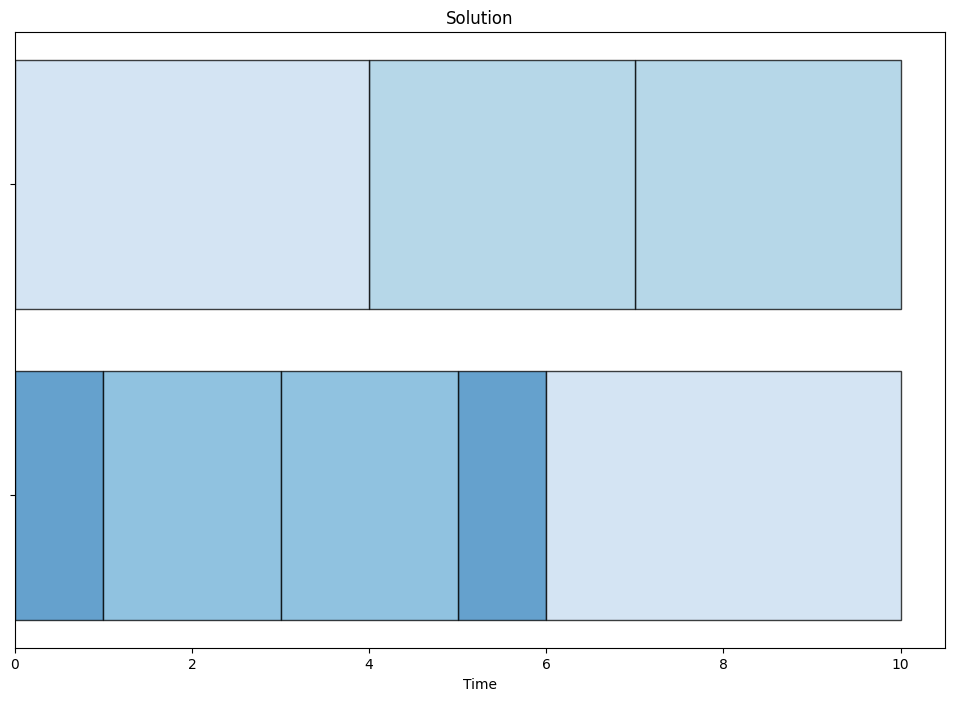

In [6]:
from pyjobshop import plot

data = model.data()
plot(data, result.best)

The plot shows a Gantt chart of our solution. Each row represents a machine and each horizontal bar represents a scheduled task.
The colors of the tasks depict the individual jobs they are associated with, with each job having a unique color.

## Conclusion

This concludes this example. We showed how to use PyJobShop's Model interface to setup a simple example, and we showed the representation of a solution and how it can be plotted. For more details about `Model`, see the [API documentation](https://pyjobshop.readthedocs.io/en/stable/api/pyjobshop.html#pyjobshop.Model.Model). In the next notebooks, we show you how to model classical scheduling models.